# Lista  8 - Física Computacional I
Alunas: Ylana K S Lopes e Camilla Balliana

In [12]:
import numpy as np
import matplotlib.pylab as plt
from math import floor

%matplotlib inline


### Problema 1

In [13]:
### a)
def f(Vout, t, RC):
    a = floor(t)
    if(a%2 == 0):
        Vin = 1
        return (1/RC)*(Vin - Vout)
    else:
        Vin = -1
        return (1/RC)*(Vin - Vout)
    
def R4K(Vout,t, RC):
    k1 = h*f(Vout,t, RC)
    k2 = h*f(Vout + 0.5*k1, t + 0.5*h, RC)
    k3 = h*f(Vout + 0.5*k2, t + 0.5*h, RC)
    k4 = h*f(Vout + k3, t + h, RC)
    return Vout + (1/6)*(k1+ 2*k2 + 2*k3 + k4)


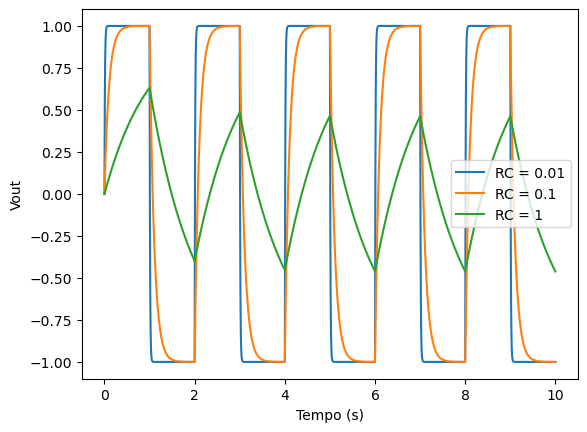

In [14]:
a = 0
b = 10
N = 10000
h = (b-a)/N
tempos = np.arange(a,b,h)
RCs = [0.01, 0.1, 1]

for RC in RCs:
    Vout = 0
    Vout_points = []    
    
    for t in tempos:
        Vout_points.append(Vout)
        Vout = R4K(Vout, t, RC)
        
    plt.plot(tempos, Vout_points)

plt.xlabel("Tempo (s)")
plt.ylabel("Vout")
plt.legend(['RC = 0.01', 'RC = 0.1', 'RC = 1']) 
plt.show()

# o valor de h como média dos dois se mostra um bom valor.

#### b) 
Quanto maior o valor do RC mais lenta é a resposta do $V_{out}$, ao mesmo tempo a onda se torna cada vez mais suavizada, pois leva mais tempo para alcançar o sinal de entrada. O circuito com o filtro RC funciona bloqueando (atenuando) as voltagens de alta potência, só deixando passar as de baixa.  

### Problema 2: As equações de Lotka–Volterra

In [15]:
### a)
alfha = 1
beta = 0.5
lamb = 0.5
delta = 2

def g(t, r):
    x, y = r[0], r[1]
    X = alfha*x - beta*x*y
    Y = lamb*x*y - delta*y
    return np.array([X, Y])

def r4k(t, r): ## sem o RC
    K1 = h*g(t,r)
    K2 = h*g(t + h/2, r + K1/2)
    K3 = h*g(t + h/2, r + K2/2) 
    K4 = h*g(t + h, r + K3)
    return r + (K1 + 2*K2 + 2*K3 + K4)/6

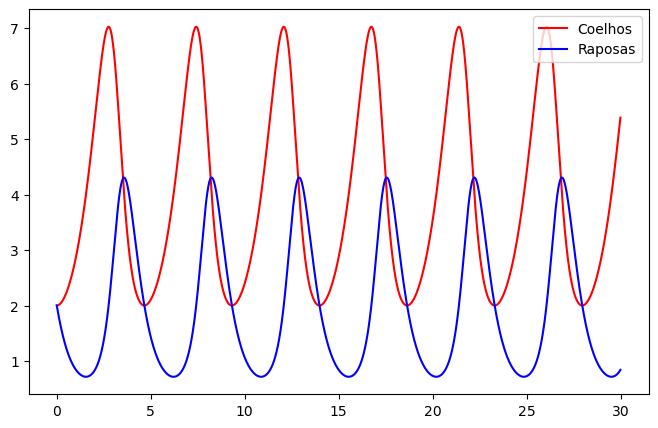

In [16]:
a, b = 0, 30
N =3000
h = (b-a)/N
t = np.arange(a,b,h)
x, y = [], []
r = np.array([2,2], float)

for i in range(0,N):
    
    x.append(r[0])
    y.append(r[1])
    r = r4k(t[i],r)
    
plt.figure(figsize = (8,5))
plt.plot(t,x,'r', label= "Coelhos")
plt.plot(t,y,'b', label = "Raposas")
plt.legend()

#### b)
É possível ver a dinâmica entre as populações, em que quando a população de presas chega ao seu máximo, a população de predadóres está no seu mínimo. Da mesma forma, quando a população de predadores (raposas) está no seu máximo, o número de presas estará caindo, pois estarão servindo de alimento para essas presas. Nesse gráfico é possível ver a os ciclos de crescimento e a relação entre essas duas populações.

### Problema 3

In [24]:
### a)
sigma, r, b = 10, 28, (8/3)


def f(v,t):
    x, y, z = v[0], v[1], v[2]
    ax = (y-x)*sigma
    ay = (r*x) - y - (x*z)
    az = (x*y) - (b*z)
    return np.array([ax, ay, az])

def RK4(v,t):
    k1 = h*f(v,t)
    k2 = h*f(v+0.5*k1, t+0.5*h)
    k3 = h*f(v+0.5*k2, t+0.5*h)
    k4 = h*f(v+k3, t+h)
    return v+(1/6)*(k1+2*k2+2*k3+k4)

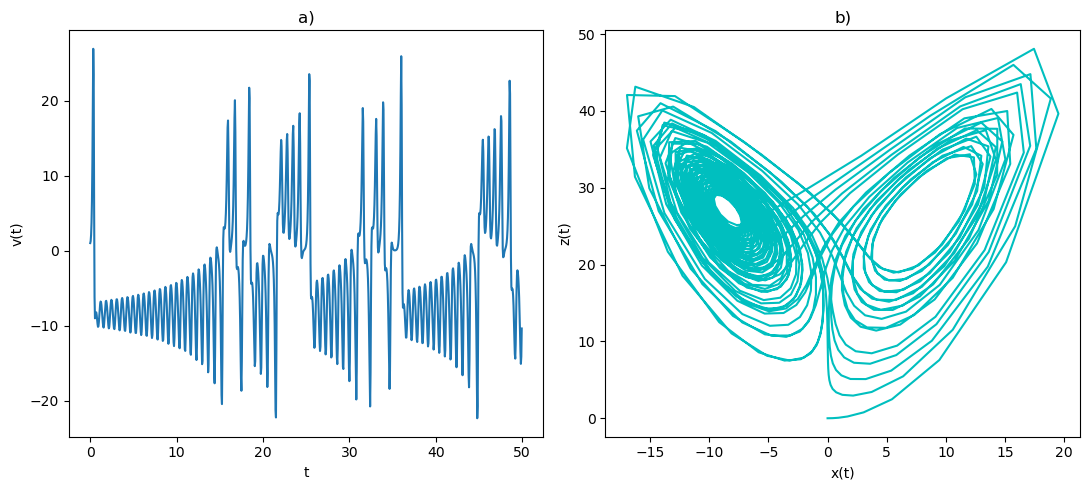

In [25]:
a, i = 0, 50
N = 1000
h = (i-a)/N
tempo = np.arange(a,i,h)
x, y, z = [], [], []
v = np.array([0,1,0], float)

for t in tempo:
    
    x.append(v[0])
    y.append(v[1])
    z.append(v[2])
    v = RK4(v,t)

fig, ax = plt.subplots(1, 2, figsize = (11,5))
ax[0].plot(tempo,y)
ax[0].set_title('a)')
ax[0].set_xlabel("t")
ax[0].set_ylabel("v(t)")

ax[1].plot(x,z, c = 'c')
ax[1].set_title('b)')
ax[1].set_xlabel("x(t)")
ax[1].set_ylabel("z(t)")

plt.tight_layout()